In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the US firm with firm-size (turnover) data all available from 2020 to 2011. For details, please see the file ``13``.

In [13]:
df, df2, df3, df4 = fq.dataprocess(file='data_all/us_to_all_postprocess.csv', var1='logturnover', var2='turnover', var3='turnover_mean')

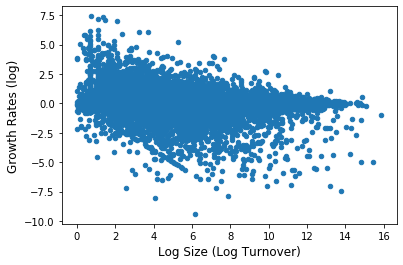

In [16]:
fq.scatterplot(df, x='logturnover', xlabel='Log Size (Log Turnover)')

In [17]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.00895, 3.526, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(3.526, 4.736, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(4.736, 6.133, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(6.133, 15.86, closed='right') ]


In [18]:
df5

,count,Unnamed: 0,year,id,turnover,logturnover,fgrow_log,quantile_ex_1
0,1,118904,2017,1267546,1.01,0.009950,3.876755,"(0.00895, 3.526]"
1,2,123502,2017,1271410,1.02,0.019803,0.084557,"(0.00895, 3.526]"
2,3,114787,2011,841935,1.02,0.019803,-2.140066,"(0.00895, 3.526]"
3,4,123110,2013,1271289,1.03,0.029559,-0.039609,"(0.00895, 3.526]"
4,5,122202,2014,1271020,1.03,0.029559,3.759844,"(0.00895, 3.526]"
...,...,...,...,...,...,...,...,...
26416,26417,67424,2014,31959,34.00,3.526361,0.057158,"(0.00895, 3.526]"
26417,26418,64494,2017,27366,34.00,3.526361,-0.125163,"(0.00895, 3.526]"
26418,26419,59090,2013,24535,34.00,3.526361,0.028988,"(0.00895, 3.526]"
26419,26420,62419,2017,26105,34.00,3.526361,0.028988,"(0.00895, 3.526]"


In [19]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([ 3.88,  0.08, -2.14, ...,  0.03,  0.03, -0.03])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

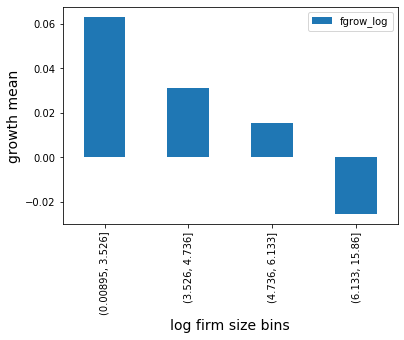

In [20]:
fq.plotbars(df3)

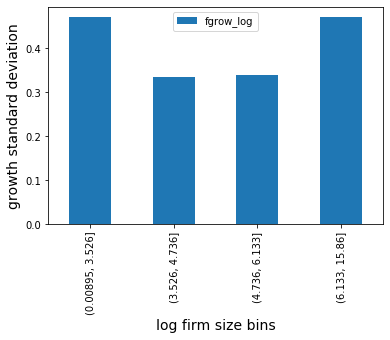

In [21]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [22]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [23]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

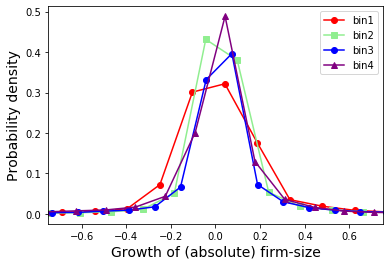

In [24]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [25]:
s_dist1 = df.turnover
s_dist2 = df.logturnover
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by total asset is

In [26]:
fq.gabaix_est(s_dist1, c=0.01)

1.3438145654052236

The tail index for log firm size distribution with firm size measured by total asset is

In [27]:
fq.gabaix_est(s_dist2, c=0.01)

16.6324480894067

The tail index for firm growth distribution with firm size measured by total asset is

In [28]:
fq.gabaix_est(s_dist3, c=0.01)

2.4431751716462085

## 3.3 tail index for firm size distribution yearly from 2011 to 2020

In [29]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].turnover
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 1.1239118051900368
Tail index in year 2012 is 1.245921358665504
Tail index in year 2013 is 1.2675204368320003
Tail index in year 2014 is 1.4128782575265195
Tail index in year 2015 is 1.4802167246507278
Tail index in year 2016 is 1.443030590533364
Tail index in year 2017 is 1.3520483852323746
Tail index in year 2018 is 1.6395914429467342


## 3.4 tail index for log firm size distribution yearly from 2011 to 2020

In [30]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].logturnover
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 14.424280445058827
Tail index in year 2012 is 15.67463687258609
Tail index in year 2013 is 15.918046900336964
Tail index in year 2014 is 17.296057910765978
Tail index in year 2015 is 18.00982168086383
Tail index in year 2016 is 17.635025649597555
Tail index in year 2017 is 16.51186184784411
Tail index in year 2018 is 19.47267090321462


## 3.5 tail index for firm growth distribution yearly from 2011 to 2020

In [31]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 2.414770877334475
Tail index in year 2012 is 2.0659897282004116
Tail index in year 2013 is 2.4624297657077303
Tail index in year 2014 is 2.2320633661858773
Tail index in year 2015 is 2.7085495368316033
Tail index in year 2016 is 2.62996706931283
Tail index in year 2017 is 2.4351875789275788
Tail index in year 2018 is 2.381912327287136
